# Projeto Convolutional Neural Net Work
Ana Paula Ferrari Januário

Cenário
Você trabalha para um varejista on-line que vende diversas peças de roupas de diversas marcas. Cada marca oferece sugestões diferentes de como categorizar cada artigo para facilitar as pesquisas dos usuários. Em vez de usar as sugestões das marcas, que muitas vezes entram em conflito entre si ou não são particularmente úteis, a vitrine usa um esquema de categorização desenvolvido internamente.
Atualmente, cada novo artigo deve ser categorizado manualmente. Um funcionário examina visualmente um produto e determina se é ou não um sapato, uma camisa, um chapéu, etc. Este é um trabalho tedioso que pode ser automatizado usando visão computacional.
Felizmente, você tem um banco de dados bastante grande de imagens de produtos existentes que já foram categorizadas. Portanto, você usará esse conjunto de dados para treinar uma rede neural convolucional (CNN) para classificar novas imagens de produtos. Depois que o modelo obtiver sucesso suficiente, você poderá colocá-lo em produção.

## Importe bibliotecas de software e carregue o conjunto de dados

In [1]:
import sys                             # Ler os parametros do sistema
import shutil
import numpy as np                     # Trabalhar com arrays e matrizes multidimensionais
from numpy.random import seed
import matplotlib as mpl               # Criar graficos 2D
import matplotlib.pyplot as plt
import sklearn                         # Performar data analysis e data mining
import tensorflow                      # Treinar Redes neuronais para deep learning
import keras                           # Prover um frontend para o tensorflow
from keras import datasets

# Carregar o dataset que vem junto do keras

(X_train, y_train), (X_test, y_test) = datasets.fashion_mnist.load_data()
print('Loaded {} training records.'.format(len(X_train.data)))
print('Loaded {} test records.'.format(len(X_test.data)))

# Comente as duas linhas a seguir para tornar os resultados não determinísticos. 
seed(1) #A semente pode ser qlq valor
tensorflow.random.set_seed(1) # Esse resultado vai ser sempre igual para essa semente


Loaded 60000 training records.
Loaded 10000 test records.


Verifique se os conjuntos de treinamento e teste foram carregados com 60.000 e 10.000 registros, respectivamente.
Este conjunto de dados – denominado Fashion-MNIST – inclui valores numéricos que podem ser usados para construir pequenas imagens em tons de cinza de diferentes tipos de roupas.

## Familiarizar com o conjunto de dados

In [2]:
print('Forma do feature space: {}\n'.format(X_train[0].shape))

print('Alguns exemplos:\n')
print(X_train[7:10])

Forma do feature space: (28, 28)

Alguns exemplos:

[[[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  0   0   0 ... 180   0   0]
  [  0   0   0 ...  72   0   0]
  [  0   0   0 ...  70   0   0]]

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...  39   1   0]
  ...
  [  0   0   0 ... 238   0   0]
  [  0   0   0 ... 131   0   0]
  [  0   0   0 ...   0   0   0]]

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   7   0   0]
  ...
  [  0   0   0 ...   0   9   0]
  [  0   0   0 ...   0   3   0]
  [  0   0   0 ...   0   0   0]]]


A forma do espaço de recursos mostra que o conjunto de treinamento é multidimensional; em vez de uma imagem com 28 features, ela possui recursos de 28 × 28. Isso corresponde às dimensões da imagem – tem 28 pixels de largura e 28 pixels de altura.
As imagens de exemplo 7, 8 e 9 estão truncados, mas você pode ver que a maioria de seus valores é 0, embora alguns tenham valores positivos reais. Cada número representa a intensidade daquele pixel específico em escala de cinza. Em outras palavras, 0 é completamente preto, enquanto 255 é completamente branco.

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

for i in range(10):
    print('{} ({})'.format(class_names[i], np.unique(y_train)[i]))

T-shirt/top (0)
Trouser (1)
Pullover (2)
Dress (3)
Coat (4)
Sandal (5)
Shirt (6)
Sneaker (7)
Bag (8)
Ankle boot (9)


Cada rótulo de classe é mapeado para seu nome de classe real (ou seja, o tipo de roupa). São 10 classes no total.

## Visualize os exemplos de dados

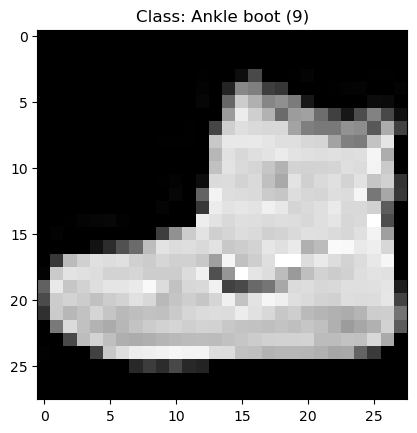

In [4]:
# Plotar apenas o primeiro exemplo
plt.imshow(X_train[0], cmap = 'gray')
plt.title('Class: {} ({})'.format(class_names[y_train[0]], y_train[0]));

Usando os recursos de escala de cinza da imagem, o Matplotlib foi capaz de traçar a aparência real da primeira imagem no conjunto de treinamento. Esta imagem é classificada como ankle boot(9)

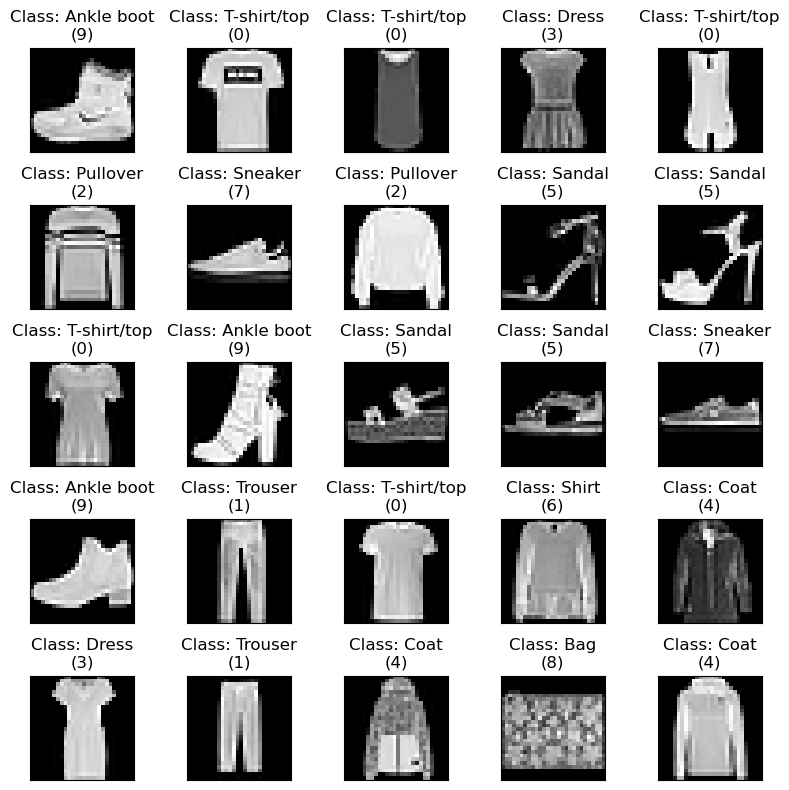

In [5]:
fig, axes = plt.subplots(nrows = 5, ncols = 5, figsize = (8, 8))

for i, ax in zip(range(25), axes.flatten()):
    ax.imshow(X_train[i,:,:], cmap = 'gray')  # Plotar os exemplos de treino
    ax.title.set_text('Class: {}\n({})'.format(class_names[y_train[i]], y_train[i]))

# Desative as marcações dos eixos para facilitar a leitura
for ax in axes.flatten():
    ax.set_xticks([])
    ax.set_yticks([])
    
fig.tight_layout()

As primeiras 25 imagens do conjunto de treinamento são plotadas em uma grade.

# Preparar os dados para treinamento com Keras

In [6]:
# Remodelar matrizes para adicionar escala de cinza
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

from keras.utils import to_categorical

# One-hot encode para cada rótulo
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print('One-hot encoding para a primeira imagem: {}'.format(y_train[0]))

One-hot encoding para a primeira imagem: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


Como os dados são bastante simples e uniformes, não é necessária muita preparação. No entanto, para que a CNN preveja uma classificação, o rótulo precisa ser codificado.
- As linhas 2 e 3 remodelam os dados para um formato suportado pelo Keras. O primeiro argumento (-1) diz à função para remodelar o conjunto de dados de acordo com seu comprimento total (número de exemplos), que você deseja preservar. Você também precisa preservar o espaço de recursos 28 × 28 nos próximos dois argumentos. O último argumento (1) indica a Keras que estas imagens estão em tons de cinza.
- Nas linhas 8 e 9, o método to_categorical() é uma maneira fácil de codificar valores one-hot usando a biblioteca Keras.

Cada imagem de exemplo agora é codificada, no exemplo há apenas um valor "ativado" (1) para uma imagem, dependendo de sua classe. Neste caso, a primeira imagem possui um 1 na última coluna, indicando que está rotulada como classe 9.

## Dividindo o conjunto de dados

Vamos dividir o conjunto de dados de treinamento para ter uma validação. Embora o conjunto de testes carregado no início esteja rotulado, iremos trata-lo como o caso de teste final.

In [7]:
from sklearn.model_selection import train_test_split

# Dividir os conjuntos de dados de treinamento e validação e seus rótulos
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state = 50)

print(f'Features de treino:         {X_train.shape}')
print(f'Features de validação:       {X_val.shape}')
print(f'Labels de treino:           {y_train.shape}')
print(f'Labels de validação:         {y_val.shape}')

Features de treino:         (45000, 28, 28, 1)
Features de validação:       (15000, 28, 28, 1)
Labels de treino:           (45000, 10)
Labels de validação:         (15000, 10)


## Estrutura da CNN

In [8]:
from tensorflow.keras.layers import LeakyReLU

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
#from keras.layers.advanced_activations import LeakyReLU A estrutura do Keras foi alterado nas versões recentes

cnn = Sequential()

# Vamos empilhar as camadas uma a uma
cnn.add(Conv2D(filters = 32,
               kernel_size = (3, 3),  # Primeira camada convolucional (32 filtros output, tamanho do filtro 3x3).
               input_shape = (28, 28, 1),
               padding = 'same',
               activation = 'linear'))  # Ativação
cnn.add(LeakyReLU(alpha = 0.1))
cnn.add(MaxPooling2D((2, 2), padding = 'same'))  # Primeira camada de pooling com tamanho 2x2.

cnn.add(Conv2D(64, (3, 3), padding = 'same', activation = 'linear'))
cnn.add(LeakyReLU(alpha = 0.1))
cnn.add(MaxPooling2D((2, 2), padding = 'same'))

cnn.add(Conv2D(128, (3, 3), padding = 'same', activation = 'linear'))
cnn.add(LeakyReLU(alpha = 0.1))                  
cnn.add(MaxPooling2D((2, 2), padding = 'same'))

cnn.add(Flatten())  # Conecte convolução e camada densa.
cnn.add(Dense(10, activation = 'softmax'))  # Camada de saída densa com ativação softmax

- A classe Sequential() indica que você construirá a estrutura como uma sequência de camadas, o que é uma maneira fácil de construir uma rede relativamente simples.
- As linhas 8 a 12 adicionam a primeira camada da pilha – a camada mais próxima da entrada. O objeto Conv2D() constrói uma camada convolucional. Esta camada específica possui os seguintes hiperparâmetros/argumentos:
    - filters: especifica o número de filtros de saída na camada convolucional. Neste caso, serão 32 filtros. Este número é um tanto arbitrário, pois não existe necessariamente um “melhor” número de filtros a serem escolhidos para qualquer camada. Porém, quanto mais filtros houver, mais tempo levará para treinar a rede.
    - kernel_size especifica as dimensões do próprio filtro. Neste caso, serão 3 × 3 pixels.
    - input_shape, como o nome sugere, é o formato dos recursos de entrada nos quais a rede treinará. O último número indica escala de cinza.
    - padding determina o preenchimento a ser usado, se houver. Um preenchimento igual significa que a camada será preenchida de tal forma que a saída da camada tenha as mesmas dimensões que a entrada da camada.
    - activation: é a função de ativação a ser usada na camada. No momento, esta é uma função linear simples. Você poderia especificar relu aqui, mas isso usa apenas a função ReLU padrão que é suscetível ao problema de desaparecimento de gradientes. Na verdade, você precisa especificar funções de ativação mais avançadas como sua própria camada. Portanto, linear está atuando como espaço reservado até então.
- A linha 13 adiciona uma camada de função de ativação avançada – neste caso, leaky ReLU. O argumento alfa é o coeficiente de inclinação.
- A linha 14 adiciona uma camada de pooling após a convolução. O primeiro argumento define o tamanho do pool – em outras palavras, o fator pelo qual a imagem será reduzida. Portanto, uma camada de pooling de (2, 2) significa que a imagem será reduzida para metade de seu tamanho inicial na largura e na altura.
- Além disso, o preenchimento/padding é usado.
- As linhas 16 a 22 repetem esse processo, adicionando mais dois grupos de camadas convolucionais e de pooling. A única mudança é que o tamanho do filtro de saída da convolução está sendo aumentado.
- A linha 24 adiciona uma camada de "achatamento" para reduzir a dimensionalidade da saída anterior para apenas uma. Isto é necessário para alimentar a saída multidimensional de uma convolução em um vetor unidimensional que é suportado pela próxima camada totalmente conectada.
- A linha 25 adiciona a camada final, a camada totalmente conectada (densa) que é semelhante a um MLP tradicional. Esta camada usa a função de ativação softmax para gerar uma decisão de classificação multiclasse a partir da entrada nivelada. O primeiro argumento especifica o número de saídas possíveis (rótulos de classe).

## Compilar o modelo e examinar as camadas

In [10]:
cnn.compile(optimizer = 'adam',
            loss = 'categorical_crossentropy',
            metrics = ['accuracy'])

cnn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                  

O método compile() pega o objeto Keras CNN construído no bloco de código anterior e o configura para treinamento.
- optimizer specifica o método de otimização de perdas a ser usado. O método Adam é semelhante à descida gradiente estocástica (SGD).
- loss é a função de perda real a ser usada. A função categorical_crossentropy é usada com classificação multiclasse; mede o quanto a probabilidade prevista para uma classe diverge do rótulo da classe real. Quanto menor o valor, melhor. Por exemplo, se a rede previsse 0,97 para uma imagem que na verdade era 0, isso seria uma discrepância muito grande e, portanto, levaria a um valor de perda mais alto.
- metrics especifica uma métrica de pontuação a ser usada além da perda. Para manter as coisas simples, vamos avaliar a precisão.

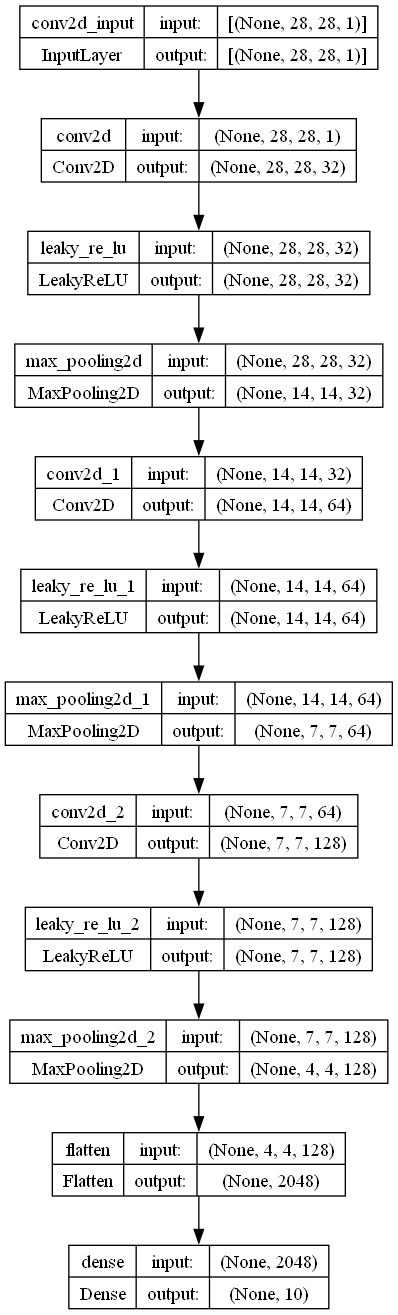

In [11]:
## Instalar a biblioteca necessária.
#!pip install graphviz==2.40.1
#se tiver problema com a instalação visite https://www.graphviz.org/download/ e instale diretamente no computador
from keras.utils import plot_model
plot_model(cnn, show_shapes = True, to_file = 'model.png')


## Treinar o modelo

In [13]:
cnn_trained = cnn.fit(X_train, y_train,
                      validation_data = (X_val, y_val),
                      epochs = 1,
                      verbose = 1)



1407/1407 [==============================] - 20s 13ms/step - loss: 0.5512 - accuracy: 0.8426 - val_loss: 0.3617 - val_accuracy: 0.8691


Devido a restrições de tempo, vamos treinar apenas para uma época. Geralmente, são treinados vários períodos.

## Vamos avaliar o modelo com os dados de teste

In [14]:
eval_test = cnn.evaluate(X_test, y_test, verbose = 0)

print('Loss: {}'.format(round(eval_test[0], 2)))
print('Accuracy: {:.0f}%'.format(eval_test[1] * 100))

Loss: 0.39
Accuracy: 86%


As pontuações no conjunto de teste devem ser bastante próximas das pontuações no conjunto de validação que nós vimos acima foi: 
- loss: 0.5512 
- accuracy: 0.8426 
- val_loss: 0.3617 
- val_accuracy: 0.8691

## Vamos fazer predições com os dados de teste

In [17]:
prediction = cnn.predict(X_test)
prediction = np.argmax(np.round(prediction), axis = 1)  # vamos extrair o número de classes do array codificado - one-hot-encoded
actual = np.argmax(np.round(y_test), axis = 1)

print('Classe actual:    {}'.format(actual[:10]))
print('Classe predicta: {}'.format(prediction[:10]))

313/313 [==============================] - 1s 3ms/step
Classe actual:    [9 2 1 1 6 1 4 6 5 7]
Classe predicta: [9 2 1 1 0 1 2 6 5 7]


## Vamos visualizar as predições para vários exemplos

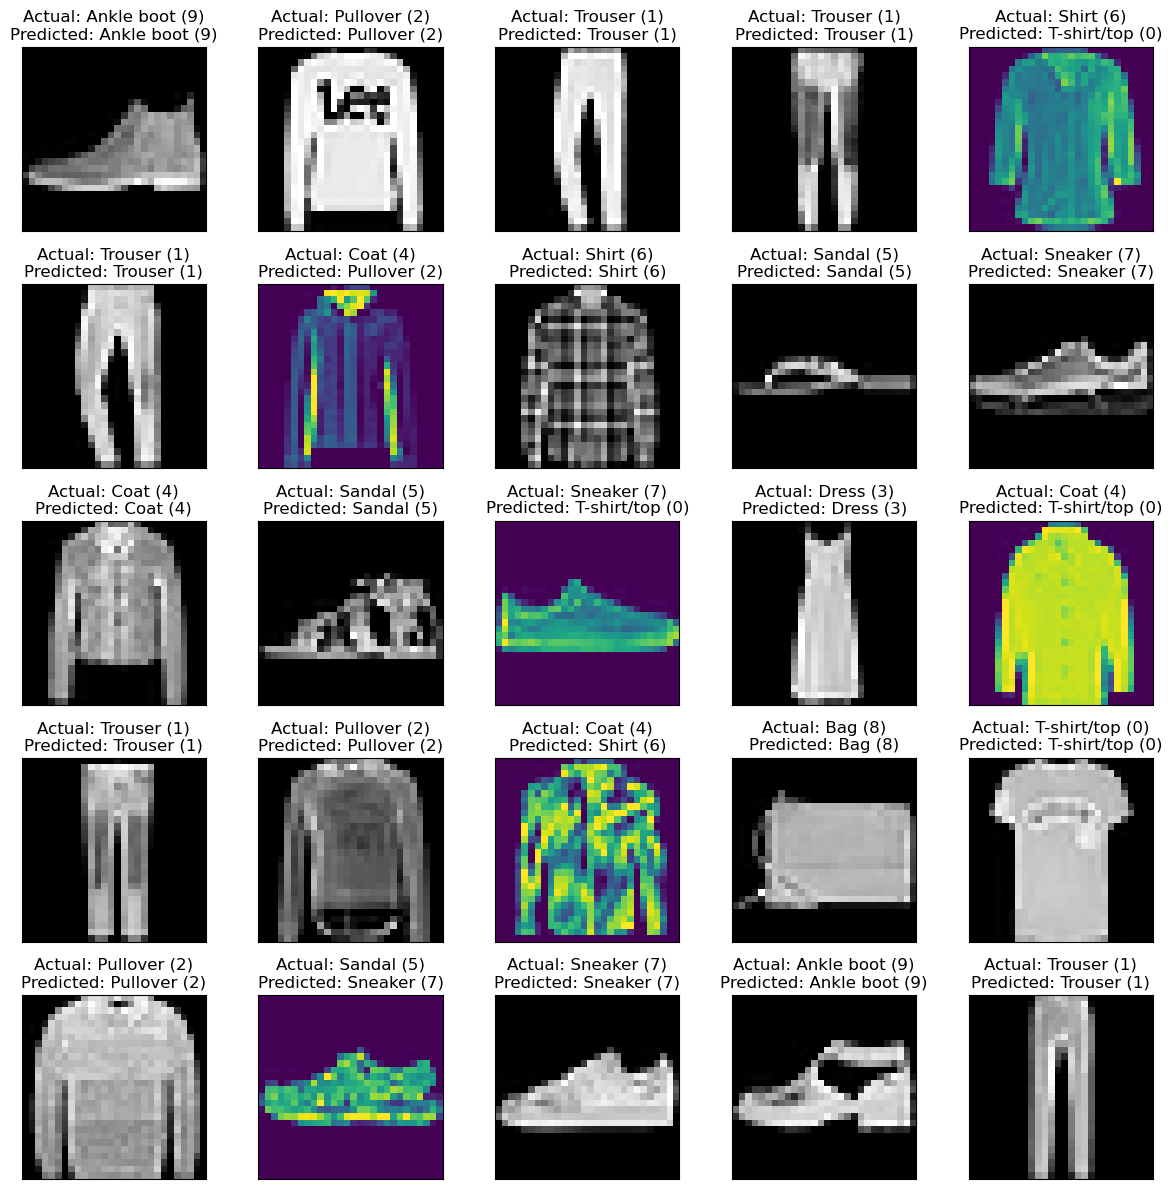

In [18]:
fig, axes = plt.subplots(nrows = 5, ncols = 5, figsize = (12, 12))

for i, ax in zip(range(25), axes.flatten()):
    
    if actual[i] == prediction[i]:
        ax.imshow(X_test[i].reshape(28, 28), cmap = 'gray')
    else:
        ax.imshow(X_test[i].reshape(28, 28))  # Highlight as predições erradas.
        
    ax.title.set_text('Actual: {} ({})\nPredicted: {} ({})'.format(class_names[actual[i]], actual[i],
                                                                   class_names[prediction[i]], prediction[i]))

# Vamos desativar as marcações dos eixos para facilitar a leitura
for ax in axes.flatten():
    ax.set_xticks([])
    ax.set_yticks([])
    
fig.tight_layout()

Isso criará uma grade de imagens, onde cada imagem terá seu rótulo de classe real e o rótulo que o modelo previu. O loop if das linhas 5 a 8 detecta previsões incorretas e "destaca" qualquer uma, traçando essa imagem com uma paleta de cores. Todas as previsões corretas serão exibidas como imagens em tons de cinza.